## Импорт используемых в проекте библиотек

In [25]:
import numpy as np # стандартная библиотека в Python для работы с n-мерными массивами
import pandas as pd # библиотека для работы с данными разных форматов (например CSV, SQL)
import pickle # библиотека для преобразования объектов в поток байтов (используется для сохранения/загрузки моделей)
import matplotlib.pyplot as plt # стандарный модуль для языка Python, использующийся при построении графиков/диаграмм

In [ ]:
# scikit-learn - одна из наиболее используемых библиотек для машинного обучения. Реализует многие алгоритмы машинного
# обучения и предоставляет инструменты для работы с данными  
from sklearn.model_selection import train_test_split # модуль для создания обучающих и тестовых выборок
from sklearn.preprocessing import StandardScaler # модуль для обработки данных перед применением методов ML
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.utils import shuffle # вспомогательный модуль, использующийся для работы с данными
from sklearn.ensemble import RandomForestClassifier # модуль для работы с ансамблевыми методами

## Загрузка и просмотр данных

In [26]:
# Загрузка датасета из локальных файлов
data = pd.read_csv(r"D:\for ML\HW-hack\train_hw.csv", sep=';') # перед путём к файлу указан 'r', чтобы избежать
                                                               # экранировани символов. Например, для корректной работы с паками
                                                               # или файлами, имена которых начинаются с 'n'. Без использования
                                                               # символа 'r', конструкция "\n" будет трактоваться как новая строка.
                                                               # Вместо 'r' можно использовать двойное '\\' в записи пути вместо '\'

In [3]:
# Вывод первых 5-ти (по умолчанию) элементов датафрейма. Проверяем, те ли данные были загружены
data.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [4]:
# Вывод названия всех столбцов датафрейма. В текущем датафрейме все столбцы не отображаются при методе ".head()"
data.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

**Обратим внимание на часть метаданных**

In [5]:
# Вывод описания (статистики) по выбранному столцу
data['FORMATION'].describe()
# Получаем информацию (статистику) по непустым (не типа 'nan') элементам: общее кол-во, число уникальных, самое распространённое,
# кол-во самого распространённого элемента, название столбца и тип содержащихся данных

count        1033517
unique            69
top       Utsira Fm.
freq          172636
Name: FORMATION, dtype: object

In [6]:
data['GROUP'].describe()

count           1169233
unique               14
top       HORDALAND GP.
freq             293155
Name: GROUP, dtype: object

In [7]:
data['WELL'].describe()

count     1170511
unique         98
top        25/2-7
freq        25131
Name: WELL, dtype: object

In [27]:
wells = data['WELL'].unique() # запись в переменную всех уникальных значений, содержащихся в столбце
wells # вывод значения переменной

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16', '16/2-6', '16/4-1', '16/5-3', '16/7-4', '16/7-5',
       '16/8-1', '17/11-1', '25/11-15', '25/11-19 S', '25/11-5',
       '25/2-13 T4', '25/2-14', '25/2-7', '25/3-1', '25/4-5', '25/5-1',
       '25/5-4', '25/6-1', '25/6-2', '25/6-3', '25/7-2', '25/8-5 S',
       '25/8-7', '25/9-1', '26/4-1', '29/6-1', '30/3-3', '30/3-5 S',
       '30/6-5', '31/2-1', '31/2-19 S', '31/2-7', '31/2-8', '31/2-9',
       '31/3-1', '31/3-2', '31/3-3', '31/3-4', '31/4-10', '31/4-5',
       '31/5-4 S', '31/6-5', '31/6-8', '32/2-1', '33/5-2', '33/6-3 S',
       '33/9-1', '33/9-17', '34/10-19', '34/10-21', '34/10-33',
       '34/10-35', '34/11-1', '34/11-2 S', '34/12-1', '34/2-4',
       '34/3-1 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/7-13',
       '34/7-20', '34/7-21', '34/8-1', '34/8-3', '34/8-7 R', '35/11-1',
       '35/11-10', '35/11-11', '35/11-12

In [9]:
# Вывод кол-ва значений в переменной (в данном случае кол-ва уникальных скважин)
len(wells)

98

**Оценим соотношение литологических типов**

In [10]:
# Создание словаря с литологическими типами (для корреляции заначений с названиями литологических типов)
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [11]:
# Вывод всех уникальных значений столбца с литологическими типами
data['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique()

array([65000, 30000, 65030, 70000, 99000, 80000, 86000, 74000, 70032,
       90000, 88000, 93000], dtype=int64)

In [12]:
# Запись в переменную литологических типов из столбца датасета вместе с их кол-вом
counts = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()

In [13]:
counts
# Получаем аналог двумерного массива из NumPy. Далее узнаем тип переменной 'counts'

65000    720803
30000    168937
65030    150455
70000     56320
80000     33329
99000     15245
70032     10513
88000      8213
90000      3820
74000      1688
86000      1085
93000       103
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

In [14]:
# Вывод типа переменной 'counts'
type(counts)
# Переменная имеет специальный тип данных из библиотеки Pandas

pandas.core.series.Series

C:\Users\fedor\AppData\Local\Temp\ipykernel_14708\1360217529.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names, rotation=45)


Text(0, 0.5, 'Lithology presence (\\%)')

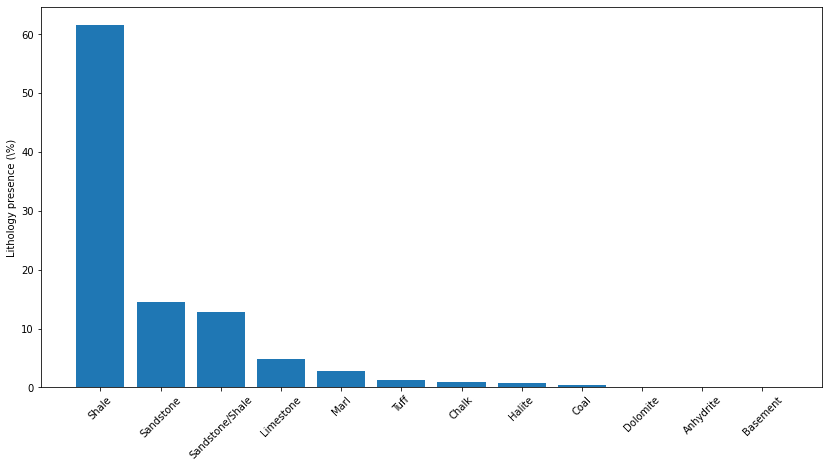

In [15]:
counts = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts() # лит. типы вместе с их кол-ом (объект типа 'Series' в Pandas)
names = [] # список, в который будут записываться названия лит. типов
percentage = [] # список, в который будут записываться процент для каждого из лит. типов
N = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].shape[0] # кол-во элементов по кол-ву строк (для расчёта %-го соотношения)
for item in counts.iteritems(): # перебираем строки 'counts'; объект 'item' явл. кортежем (неизменяемый список) с именем строки и значением, т.е. лит. типоми его кол-ом (на основе метода ".iteritems()", который возвращает именно этот тип данных)
    names.append(lithology_keys[item[0]]) # добавляем в список 'names' название текущего лит. типа на основе словаря 
    percentage.append(float(item[1])/N*100) # добавляем в список 'percentage' данные о процентном содержании текущего лит. типа относительного общего числа записей о лит. типах

# Визуализируем собранную информацию
fig, ax = plt.subplots(1, 1, figsize=(14, 7)) # создаём область (fig) и размещённый в ней холст (ax). Метод ".subplots()" возвращает два необходимых объекта
ax.bar(x=np.arange(len(names)), height=percentage) # создаём на холсте (ax) столбчатую диаграмму. Метод ".arange(len(names))" создаёт массив с равномерно разнесёнными значениями
# Добавляем подписи
ax.set_xticklabels(names, rotation=45)
ax.set_xticks(np.arange(len(names)))
ax.set_ylabel('Lithology presence (\%)')

In [16]:
#stratified key fold

## Просмотр отсутствующих значений

In [3]:
# Вывод информаци о наличии пропущенных значений для всех столбцов
data.isna().any() # метод ".isna()" проверяет наличие 'nan' значений в объекте, для которого его вызвали 
                  # (в данном случае для всего датафрейма) и возвращает объект, состоящий из переменных True/False. 
                  # Метод ".any()" проверяет по столбцам объекта является ли в них какой-либо элемент истинным (True или 0)

WELL                                 False
DEPTH_MD                             False
X_LOC                                 True
Y_LOC                                 True
Z_LOC                                 True
GROUP                                 True
FORMATION                             True
CALI                                  True
RSHA                                  True
RMED                                  True
RDEP                                  True
RHOB                                  True
GR                                   False
SGR                                   True
NPHI                                  True
PEF                                   True
DTC                                   True
SP                                    True
BS                                    True
ROP                                   True
DTS                                   True
DCAL                                  True
DRHO                                  True
MUDWEIGHT  

In [18]:
# Вывод кол-ва пропущенных элементов в каждом столбце
data.isna().sum()

WELL                                       0
DEPTH_MD                                   0
X_LOC                                  10775
Y_LOC                                  10775
Z_LOC                                  10775
GROUP                                   1278
FORMATION                             136994
CALI                                   87877
RSHA                                  539861
RMED                                   38993
RDEP                                   11015
RHOB                                  161269
GR                                         0
SGR                                  1101158
NPHI                                  405102
PEF                                   498819
DTC                                    80863
SP                                    306264
BS                                    487854
ROP                                   635440
DTS                                   995898
DCAL                                  871678
DRHO      

In [23]:
data[data['WELL'] == "25/2-7"].isna().all()

WELL                                 False
DEPTH_MD                             False
X_LOC                                False
Y_LOC                                False
Z_LOC                                False
GROUP                                False
FORMATION                            False
CALI                                 False
RSHA                                 False
RMED                                 False
RDEP                                 False
RHOB                                 False
GR                                   False
SGR                                   True
NPHI                                 False
PEF                                  False
DTC                                  False
SP                                   False
BS                                   False
ROP                                  False
DTS                                   True
DCAL                                  True
DRHO                                 False
MUDWEIGHT  

**Оценим соотношение nan значений по столбцам**

C:\Users\fedor\AppData\Local\Temp\ipykernel_14708\1631084686.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.columns[2:-2], rotation=45)


Text(0, 0.5, 'Well presence (\\%)')

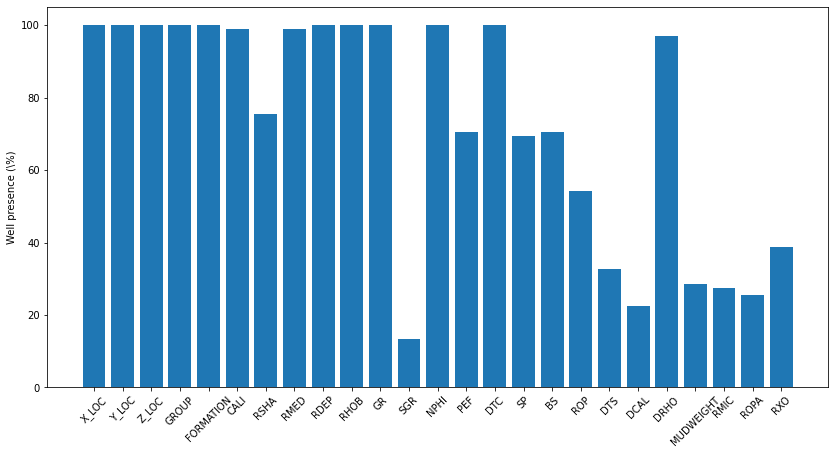

In [19]:
occurences = np.zeros(25) # массив NumPy из 25 элементов по кол-ву столбцов, для которых будем исследовать процентное соотношение nan значений 
for well in data['WELL'].unique(): # перебираем все уникальные значения в столбце
    occurences += data[data['WELL'] == well].isna().all().astype(int).values[2:-2] # "data['WELL'] == well" - возвращает объект Series, где значения датафрейма заменяются на bool
                                                                                   # "data[data['WELL'] == well]" - возвращает датафрейм со значениями для конкретной скважины
                                                                                   # ".isna().all()" - возвращает объект Series, где указано по столбцам какие из них полностью пустные
                                                                                   # ".astype(int).values[2:-2]" - преобразует весь объект к выбранному типу и возвращает объект типа NumPy, преобразуя в него датафрейм (в квадратных скобках записаны столбцы, которые нужно преобразовать от 2-го включительно до предпоследнего невключительно)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(occurences.shape[0]), height=(data.WELL.unique().shape[0]-occurences)/data.WELL.unique().shape[0]*100.0)
ax.set_xticklabels(data.columns[2:-2], rotation=45)
ax.set_xticks(np.arange(occurences.shape[0]))
ax.set_ylabel('Well presence (\%)')

**Посмотрим на вид нескольких каратажных кривых**

(3272.024, 494.528)

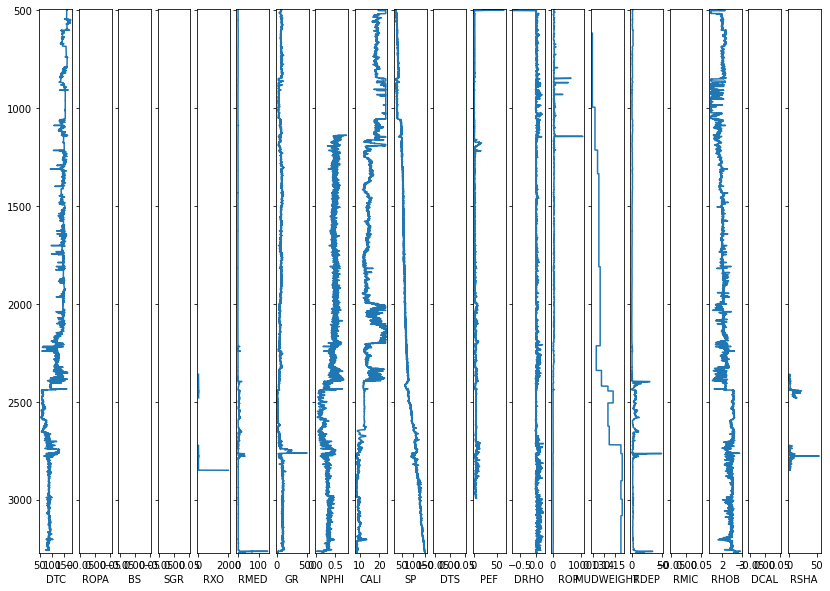

In [30]:
well_data = data[data['WELL'] == wells[0]] # запись в переменную части датафрейма с информацией только о 1-ой в списке 'well' скважине
fig, axs = plt.subplots(1, len(well_data.columns)-9, figsize=(14, 10), sharey=True) # параметр "sharey" делает ось Y общей для всех холстов "axes"
for ic, col in enumerate(set(well_data.columns)-set(['DEPTH_MD', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
                                                     'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL', 'GROUP', 'FORMATION',
                                                    'X_LOC', 'Y_LOC', 'Z_LOC'])): # enumerate() добавляет счётчик, превращая объект в кортеж.
                                                                                  # Например, for e in enumerate(elements). Здесь вместо elements будет кортеж (counter, element)
                                                                                  # По умолчанию отсчёт начинается с 0, но можно передать вторым параметром число, с которого будет начинаться отсчёт
                                                                                  # Метод ".set()" преобразует объект в множество {} (запись аналогична словарю). Множество похоже на список, только упорядочено и не содержит дубликатов
    axs[ic].plot(well_data[col], well_data['DEPTH_MD'])
    axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['DEPTH_MD'].values[-1], well_data['DEPTH_MD'].values[0]) # обрезаем ось Y для первого холста. Т.к. оси для всех холстов связаны, то изменяются они изменяются сразу для всех холстов

(4422.0172, 2484.1692)

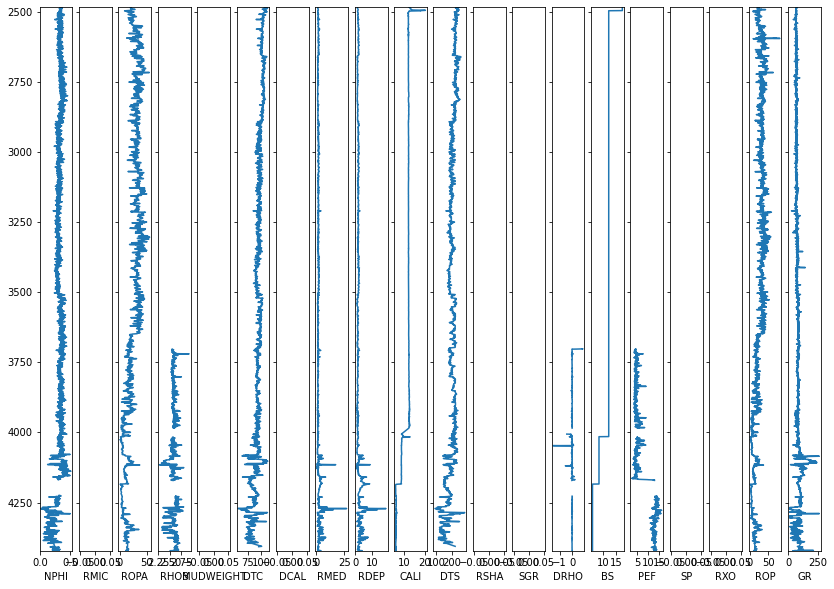

In [21]:
well_data = data[data['WELL'] == wells[57]]
fig, axs = plt.subplots(1, len(well_data.columns)-9, figsize=(14, 10), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['DEPTH_MD', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
                                                     'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL', 'GROUP', 'FORMATION',
                                                    'X_LOC', 'Y_LOC', 'Z_LOC'])):
    axs[ic].plot(well_data[col], well_data['DEPTH_MD'])
    axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['DEPTH_MD'].values[-1], well_data['DEPTH_MD'].values[0])

### Preparing data for training

In [22]:
X = data.drop(columns=['WELL', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE'])

##### As a simple approach we replace nan with zero and hope for the best

In [23]:
X.fillna(0, inplace=True)

#### We should convert lithology labels to numbers 0-11 before training

In [24]:
y = data['FORCE_2020_LITHOFACIES_LITHOLOGY']

In [25]:
lithology_numbers = {30000: 0,
                 65030: 1,
                 65000: 2,
                 80000: 3,
                 74000: 4,
                 70000: 5,
                 70032: 6,
                 88000: 7,
                 86000: 8,
                 99000: 9,
                 90000: 10,
                 93000: 11}

In [26]:
y = y.map(lithology_numbers)

In [27]:
y

0          2
1          2
2          2
3          2
4          2
          ..
1170506    0
1170507    1
1170508    1
1170509    1
1170510    1
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, Length: 1170511, dtype: int64

##### Lithologies are not equally likely. Probably smart to take this into account by computing class weights

In [28]:
np.bincount(y)

array([168937, 150455, 720803,  33329,   1688,  56320,  10513,   8213,
         1085,  15245,   3820,    103], dtype=int64)

##### Shuffle the data

In [29]:
X, y = shuffle(X, y, random_state=42)

In [30]:
X

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
30423,2343.304000,436806.46875,6463010.5,-2318.007324,ROGALAND GP.,Lista Fm.,14.882113,0.771240,0.771240,0.662699,...,88.208725,12.250001,12.761565,0.000000,2.632109,0.115312,0.143792,0.000000,0.000000,0.57085
1073159,3582.467851,543919.75000,6856653.5,-3477.858154,CROMER KNOLL GP.,Roedby Fm.,8.645628,0.000000,5.599961,4.988578,...,0.000000,8.500000,10.556081,150.206314,0.000000,-0.007215,0.000000,6.627153,10.410796,0.00000
436368,734.814000,483545.34375,6590313.0,-709.762207,NORDLAND GP.,Utsira Fm.,0.000000,0.000000,0.000000,1.000559,...,0.000000,17.500000,109.271744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
290688,1075.968000,487291.25000,6643945.0,-1053.937988,HORDALAND GP.,0,17.646826,0.000000,0.867609,1.231773,...,21.596836,17.500000,7.970956,0.000000,0.215513,0.051340,0.958611,0.000000,0.000000,0.00000
1118085,3580.061600,537897.75000,6791142.5,-3069.179688,BAAT GP.,Rannoch Fm.,8.572706,0.000000,7.634528,8.066478,...,0.000000,8.500000,31.773550,140.671463,0.000000,0.039784,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,2619.545201,0.00000,0.0,0.000000,ZECHSTEIN GP.,Smith Bank Fm.,12.437759,0.000000,0.000000,0.000000,...,0.000000,12.250001,2.385924,0.000000,0.000000,0.000000,1.425934,0.000000,0.000000,0.00000
259178,3032.057901,476870.34375,6625402.0,-3008.017822,VIKING GP.,Draupne Fm.,12.151999,1.934554,1.315825,1.341654,...,58.382977,12.250001,0.000000,0.000000,-0.098000,0.037645,0.000000,0.000000,0.000000,0.00000
131932,2015.638396,476768.28125,6523588.5,-1989.272949,HEGRE GP.,Skagerrak Fm.,8.527798,0.000000,1.631037,1.619809,...,0.000000,8.500000,9.060954,172.162643,0.000000,-0.001382,0.000000,0.000000,0.000000,0.00000
671155,1424.414000,530753.68750,6732068.0,-1380.430908,ROGALAND GP.,Lista Fm.,0.000000,0.000000,0.000000,0.576554,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


#### Select only the columns you want to use

In [31]:
X.columns

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION', 'CALI',
       'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF', 'DTC', 'SP',
       'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO'],
      dtype='object')

In [32]:
X = X[['DEPTH_MD', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS']]

##### Scale the features

In [33]:
scaler = StandardScaler()

In [34]:
X.columns

Index(['DEPTH_MD', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS'],
      dtype='object')

In [35]:
X = scaler.fit_transform(X)

##### Split into train and test data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Applying the custom scoring function

Apart from the missing log curves, **one of the key challenges of this machine learning competition is that you are being scored using a custom scoring function**. 

A prediction is scored using the penalty function
$$ S = - \frac{1}{N}\sum_{i=0}^N A_{ \hat{y}_i y_i} $$
where $N$ is the number of samples, $y_i$ is prediction for sample $i$, $\hat{y}_i$ is the true target for sample $i$, and $A$ is the penalty matrix given by the following

In short, the value of the matrix A at row i and column j is the **penalty** given by guessing lithology number i when the correct label is lithology numner j. Notice that the diagonal consists of zeros, no penalty is given for correct predictions.

In [37]:
# A = np.load('penalty_matrix.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'penalty_matrix.npy'

In [38]:
A=np.array([[0.   , 2.   , 3.5  , 3.   , 3.75 , 3.5  , 3.5  , 4.   , 4.   ,
        2.5  , 3.875, 3.25 ],
       [2.   , 0.   , 2.375, 2.75 , 4.   , 3.75 , 3.75 , 3.875, 4.   ,
        3.   , 3.75 , 3.   ],
       [3.5  , 2.375, 0.   , 2.   , 3.5  , 3.5  , 3.75 , 4.   , 4.   ,
        2.75 , 3.25 , 3.   ],
       [3.   , 2.75 , 2.   , 0.   , 2.5  , 2.   , 2.25 , 4.   , 4.   ,
        3.375, 3.75 , 3.25 ],
       [3.75 , 4.   , 3.5  , 2.5  , 0.   , 2.625, 2.875, 3.75 , 3.25 ,
        3.   , 4.   , 3.625],
       [3.5  , 3.75 , 3.5  , 2.   , 2.625, 0.   , 1.375, 4.   , 3.75 ,
        3.5  , 4.   , 3.625],
       [3.5  , 3.75 , 3.75 , 2.25 , 2.875, 1.375, 0.   , 4.   , 3.75 ,
        3.125, 4.   , 3.75 ],
       [4.   , 3.875, 4.   , 4.   , 3.75 , 4.   , 4.   , 0.   , 2.75 ,
        3.75 , 3.75 , 4.   ],
       [4.   , 4.   , 4.   , 4.   , 3.25 , 3.75 , 3.75 , 2.75 , 0.   ,
        4.   , 4.   , 3.875],
       [2.5  , 3.   , 2.75 , 3.375, 3.   , 3.5  , 3.125, 3.75 , 4.   ,
        0.   , 2.5  , 3.25 ],
       [3.875, 3.75 , 3.25 , 3.75 , 4.   , 4.   , 4.   , 3.75 , 4.   ,
        2.5  , 0.   , 4.   ],
       [3.25 , 3.   , 3.   , 3.25 , 3.625, 3.625, 3.75 , 4.   , 3.875,
        3.25 , 4.   , 0.   ]])

In [39]:
A

array([[0.   , 2.   , 3.5  , 3.   , 3.75 , 3.5  , 3.5  , 4.   , 4.   ,
        2.5  , 3.875, 3.25 ],
       [2.   , 0.   , 2.375, 2.75 , 4.   , 3.75 , 3.75 , 3.875, 4.   ,
        3.   , 3.75 , 3.   ],
       [3.5  , 2.375, 0.   , 2.   , 3.5  , 3.5  , 3.75 , 4.   , 4.   ,
        2.75 , 3.25 , 3.   ],
       [3.   , 2.75 , 2.   , 0.   , 2.5  , 2.   , 2.25 , 4.   , 4.   ,
        3.375, 3.75 , 3.25 ],
       [3.75 , 4.   , 3.5  , 2.5  , 0.   , 2.625, 2.875, 3.75 , 3.25 ,
        3.   , 4.   , 3.625],
       [3.5  , 3.75 , 3.5  , 2.   , 2.625, 0.   , 1.375, 4.   , 3.75 ,
        3.5  , 4.   , 3.625],
       [3.5  , 3.75 , 3.75 , 2.25 , 2.875, 1.375, 0.   , 4.   , 3.75 ,
        3.125, 4.   , 3.75 ],
       [4.   , 3.875, 4.   , 4.   , 3.75 , 4.   , 4.   , 0.   , 2.75 ,
        3.75 , 3.75 , 4.   ],
       [4.   , 4.   , 4.   , 4.   , 3.25 , 3.75 , 3.75 , 2.75 , 0.   ,
        4.   , 4.   , 3.875],
       [2.5  , 3.   , 2.75 , 3.375, 3.   , 3.5  , 3.125, 3.75 , 4.   ,
        0.   , 2.5  

The scoring function can be implemented as follows. If used as a loss function in a neural network framwork, it is recommended to implement a more efficient function based on tensor products. 

In [40]:
def score(y_true, y_pred):
    S = 0.0
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    for i in range(0, y_true.shape[0]):
        S -= A[y_true[i], y_pred[i]]
    return S/y_true.shape[0]

**IMPORTANT: The implementation above assumes zero-indexed y_true and y_pred. Be careful not to mix zero-indexed and 1-indexed class labels.**

Let us see what happens when we test the scoring function on some corner cases:

##### Lazily guessing SHALE for everything gives an OK score due to the imbalance of the dataset

In [41]:
score(y_test.values, np.ones(y_test.shape)*2)

-1.154113253567874

##### Doing the same for an uncommon class, like COAL, not so much..

In [42]:
score(y_test.values, np.ones(y_test.shape)*11)

-3.0950906225037698

##### Of course getting it completely right gives the highest possible score, 0

In [43]:
score(y_test.values, y_test.values)

0.0

### Example prediction on open test dataset

##### Train an oversimplified dummy model for the sake of the example
In order to give examples of how to submit predictions and reproducible code, we will train a RandomForestClassifier on the full feature set where we lazily have set all missing values (NaNs) to zero. This is an example only, following along this approach for the competition is not recommended. However, the template below can be used for generating predictions for the weekly leaderboard from your own model, and as an example on how to ecapsulate your model for final scoring where you have to submit code.

Apart from the inherent flaws of the random forest classifier, this example approach has a number of issues and simplifications. For example:
* Data is not separated per well. Normalization and shuffling is done across the whole dataset.
* The penatly matrix is not taken into account, it is treated as a normal classification problem.
* Missing logs are treated as zeros
* Depth and formation tops not taken into account
* Same model is used for when you only have gamma ray logs as when you have the full set of logs

In [44]:
model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')

In [45]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=50,
                       random_state=42)

#### Test model

In [46]:
y_pred_test = model.predict(X_test)

In [47]:
score(y_test.values, y_pred_test)

-0.13149553828870197

##### Save model and scaler to files

In [ ]:
pickle.dump(model, open('model.pkl', 'wb'))

In [ ]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In order to make it easy to run inference on new data, such as the open test dataset, it is recommended to wrap the initialization of the model, all preprocessing steps including normalization, treatment of NaNs and removals of unused columns in a class or pipeline. There are many ways of doing this, one example being a class like below:

In [ ]:
class Model(object):
    def __init__(self, model_file, scaler_file):
        # Load pre-trained model from file
        self.model = pickle.load(open(model_file, 'rb'))
        # Load a "pre-trained" scaler from file
        self.scaler = pickle.load(open(scaler_file, 'rb'))
        
    def _preprocess(self, features):
        # Method to be run before inference. Contains things like
        # stripping unwanted columns, replacing NaNs, and scaling 
        # or normalizing data
        features.fillna(0, inplace=True)
        features = features[['DEPTH_MD', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS']]
        return self.scaler.transform(features)
        
    def predict(self, features):
        # This function should be able to take in features in their
        # raw, unprocessed form as read from the file test.csv and
        # return predictions as an array integers of the same length
        X = self._preprocess(features)
        return self.model.predict(X)

The model can then be initialized using persisted data in the form of saved model file (or models files), scaler files, and other persisted data.  

In [ ]:
model = Model('model.pkl', 'scaler.pkl')

##### Example submission: weekly leaderboard
For the weekly leaderboard that will start September 1st, you are asked to submit predictions on the supplied open dataset in the file `test.csv`. This file contains all the columns that are in the training data except LITHOLOGY and LITHOLOGY_CONFIDENCE. Notice that the test data will also have missing columns. It is therefore important that your inference pipeline has the treatment of these missing columns as part of the pre-processing step.

In [ ]:
open_test_features = pd.read_csv('test.csv', sep=';')

In [ ]:
open_test_features.head()

In [ ]:
open_test_features.columns

In [ ]:
test_prediction = model.predict(open_test_features)

In [ ]:
test_prediction

**Important:** Before submitting we must map these predictions back to the lithology labels

In [ ]:
category_to_lithology = {y:x for x,y in lithology_numbers.items()}

In [ ]:
test_prediction_for_submission = np.vectorize(category_to_lithology.get)(test_prediction)

For submission to the weekly leaderboard, write the predictions as a csv file
- single column (no index column or similar)
- header: 'lithology'
- exactly the same number of rows as the raw test features
- use the original lithology labels, 65000, 30000, ..., NOT the encoded ones 0, 1, 2, ...

Example:
```
lithology
65000
65000
30000
30000
30000
30000
30000
65030
65030
65030
.
.
.
```

In [ ]:
test_prediction_for_submission

In [ ]:
np.savetxt('test_predictions.csv', test_prediction_for_submission, header='lithology', comments='', fmt='%i')

### Submitting code for final scoring
At the end of the competition, the highest performing teams are invited to submit code for blind scoring on a hidden test dataset. The winner will be the team with the best score on the hidden test dataset, not the weekly leaderboard. In order to do this, you must submit the following in a zip-file:
* Code to do the inference
* Any persisted data in the form of pre-trained model or models, scalers, and more
* Information about your environment

There are many ways of doing this. In the example above, the code to do the inference would be the `Model` class in a python-file, the persisted data would be the files `model.pkl` and `scaler.pkl`. 

Your python environment needs to be replicable by the judges of the competition. There are many ways of doing this. Examples include dumping pip package versions to a file

In [ ]:
!pip freeze > requirements.txt

If you are using Anaconda, then you can export an envionment file as follows

In [ ]:
!conda env export > environment.yml

Other options include `Docker`, `pipenv` and many more.